 #### Спрогнозировать выход в Attrition (ATR) - полное погашение кредита. 
 
Сделать анализ поколений из выборки с семинара. 
Для каждого клиента, который ушел в ATR, стоит прометка atr_flg=1 в том месяце, когда клиент поменял статус.

*  Построить кривые ATR ratio для разных поколений
*  Проанализировать зависимость ATR ratio от PD
*  Проанализировать зависимость ATR ratio от канала привлечения - поле "channel"
*  Построить модельную кривую - ATR (ratio/rate)

#### Спрогнозировать транзакционное поведение клиентов - доля снятия наличных среди всех транзакций клиента. 

Использовать выборку с семинара и поля:

Trans_amt - общая сумма транзакций в текущем месяце

Cash_amt - сумма снятия наличных в текущем месяце

In [73]:
import pandas as pd
import numpy as np

sample1 = pd.read_csv(
    'https://www.dropbox.com/s/t7xliiu0vz36geq/Sample.csv?dl=1',
    sep=";",
    encoding='cp1251',
    date_parser=lambda x: pd.to_datetime(x, format='%d%b%Y'), #преобразуем даты
    parse_dates=['statement_dt', 'generation_month']
)
sample1.head(10)

,account_rk,statement_dt,statement_num,generation_month,status_npv,pd,trans_amt,cash_amt,pd_bucket,pd_calibrated,PD_bucket_calibrated,default_flg,prev_act_flg,atr_flg,channel
0,1365508,2017-01-16,19,2015-07-01,CUR,0.08504,8000.0,0.0,3,0.079057,2,0,1,0,channel_1
1,1365508,2016-02-16,8,2015-07-01,CUR,0.08504,0.0,0.0,3,0.079057,2,0,1,0,channel_1
2,1365508,2017-05-16,23,2015-07-01,DLQ,0.08504,0.0,0.0,3,0.079057,2,0,1,0,channel_1
3,1365508,2016-05-16,11,2015-07-01,CUR,0.08504,0.0,0.0,3,0.079057,2,0,1,0,channel_1
4,1365508,2017-08-16,26,2015-07-01,CUR,0.08504,0.0,0.0,3,0.079057,2,0,1,0,channel_1
5,1365508,2016-12-16,18,2015-07-01,CUR,0.08504,0.0,0.0,3,0.079057,2,0,1,0,channel_1
6,1365508,2016-08-16,14,2015-07-01,CUR,0.08504,0.0,0.0,3,0.079057,2,0,1,0,channel_1
7,1365508,2016-04-16,10,2015-07-01,CUR,0.08504,0.0,0.0,3,0.079057,2,0,1,0,channel_1
8,1365508,2017-09-16,27,2015-07-01,CUR,0.08504,0.0,0.0,3,0.079057,2,0,1,0,channel_1
9,1365508,2017-04-16,22,2015-07-01,CUR,0.08504,0.0,0.0,3,0.079057,2,0,1,0,channel_1


In [2]:
sample1.pivot_table(values='account_rk', index='generation_month', columns='atr_flg',
                    aggfunc=np.count_nonzero, fill_value=0)

atr_flg,0,1
generation_month,,
2015-07-01,240370,32193
2016-04-01,301924,26056
2017-01-01,202969,10003


In [34]:
sample1.pivot_table('default_flg', index='statement_num', columns='generation_month')

generation_month,2015-07-01 00:00:00,2016-04-01 00:00:00,2017-01-01 00:00:00
statement_num,,,
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.014779,0.017696,0.010494
6,0.023079,0.026007,0.016534
7,0.034220,0.035190,0.021293
8,0.041837,0.045512,0.029286
9,0.047067,0.052886,0.035509


**Построим графики доли ATR для разных поколений**

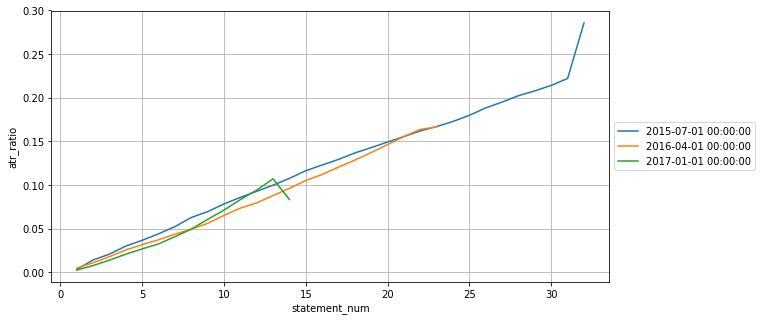

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt 

(sample1.pivot_table('atr_flg', index='statement_num', columns='generation_month')
        .plot(figsize=(10, 5), grid=True))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('atr_ratio');

**Разобьем на категории по откалиброванному PD.**

In [56]:
(sample1.groupby("PD_bucket_calibrated")
        .agg({"atr_flg": np.mean})
        .rename(columns={'atr_flg': 'atr_ratio'}))

,atr_ratio
PD_bucket_calibrated,
1,0.089648
2,0.086315
3,0.079175
4,0.084203


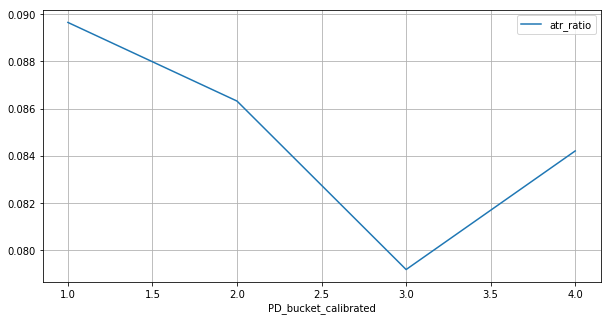

In [57]:
(sample1.groupby("PD_bucket_calibrated")
        .agg({"atr_flg": np.mean})
        .rename(columns={'atr_flg': 'atr_ratio'})
.plot(figsize=(10, 5), grid=True))

**Разобьем на категории по каналу привлечения**.

In [58]:
(sample1.groupby("channel")
        .agg({"atr_flg": np.mean})
        .rename(columns={'atr_flg': 'atr_ratio'}))

,atr_ratio
channel,
channel_1,0.060653
channel_2,0.504504
channel_3,0.492192


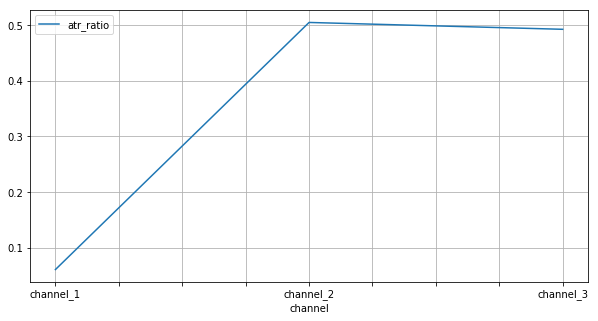

In [59]:
(sample1.groupby("channel")
        .agg({"atr_flg": np.mean})
        .rename(columns={'atr_flg': 'atr_ratio'})
.plot(figsize=(10, 5), grid=True))

**Посмотрим модельную кривую ATR (ratio/rate).**

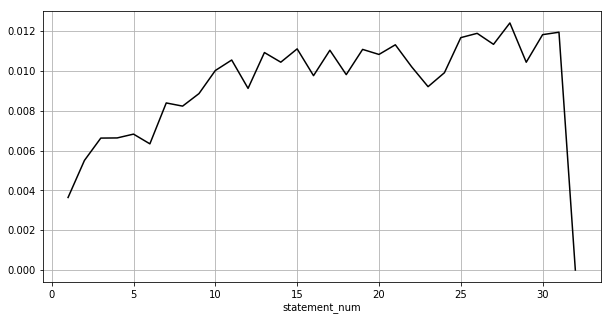

In [60]:
def plot_model_atr_rate(ax=None):
    array = (
        sample1
        .eval('rate_flg = atr_flg * prev_act_flg', inplace=False)
        .query('PD_bucket_calibrated == 2 or PD_bucket_calibrated == 3')
        .groupby(["statement_num"])
        .agg({"rate_flg":np.sum, "prev_act_flg": np.sum})
        .eval('atr_rate = rate_flg / prev_act_flg', inplace=False)
        ['atr_rate']
    )
    
    return array.plot(ax=ax, color='black', figsize=(10, 5), grid=True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot_model_atr_rate();

**Спрогнозируем долю снятия наличных среди всех транзакций клиента.**

In [74]:
sample1['cash_rate'] = sample1.cash_amt / sample1.trans_amt

In [75]:
sample1.cash_rate = sample1.cash_rate.fillna(0)

In [83]:
sample1[sample1.account_rk == 1365508]

,account_rk,statement_dt,statement_num,generation_month,status_npv,pd,trans_amt,cash_amt,pd_bucket,pd_calibrated,PD_bucket_calibrated,default_flg,prev_act_flg,atr_flg,channel,cash_rate
0,1365508,2017-01-16,19,2015-07-01,CUR,0.08504,8000.00,0.0,3,0.079057,2,0,1,0,channel_1,0.0
1,1365508,2016-02-16,8,2015-07-01,CUR,0.08504,0.00,0.0,3,0.079057,2,0,1,0,channel_1,0.0
2,1365508,2017-05-16,23,2015-07-01,DLQ,0.08504,0.00,0.0,3,0.079057,2,0,1,0,channel_1,0.0
3,1365508,2016-05-16,11,2015-07-01,CUR,0.08504,0.00,0.0,3,0.079057,2,0,1,0,channel_1,0.0
4,1365508,2017-08-16,26,2015-07-01,CUR,0.08504,0.00,0.0,3,0.079057,2,0,1,0,channel_1,0.0
5,1365508,2016-12-16,18,2015-07-01,CUR,0.08504,0.00,0.0,3,0.079057,2,0,1,0,channel_1,0.0
6,1365508,2016-08-16,14,2015-07-01,CUR,0.08504,0.00,0.0,3,0.079057,2,0,1,0,channel_1,0.0
7,1365508,2016-04-16,10,2015-07-01,CUR,0.08504,0.00,0.0,3,0.079057,2,0,1,0,channel_1,0.0
8,1365508,2017-09-16,27,2015-07-01,CUR,0.08504,0.00,0.0,3,0.079057,2,0,1,0,channel_1,0.0
9,1365508,2017-04-16,22,2015-07-01,CUR,0.08504,0.00,0.0,3,0.079057,2,0,1,0,channel_1,0.0


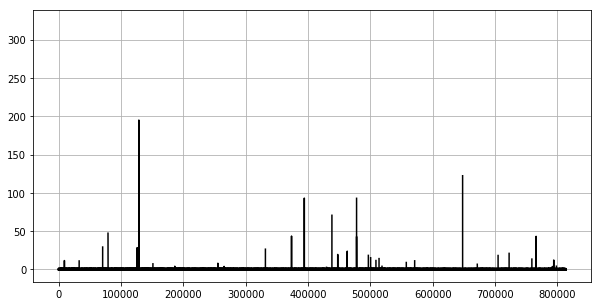

In [87]:
def plot_model_cash_rate(ax=None):
    array = (
        sample1.eval('cash_rate = cash_amt / trans_amt', inplace=False)
        .groupby(["statement_num"])
        ['cash_rate']
    )
    
    return array.plot(ax=ax, color='black', figsize=(10, 5), grid=True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot_model_cash_rate();